# isotopes
Some examples of what can be done

In [1]:
import isotopes as iso
import matplotlib.pyplot as plt

## Handling molecular formula


In [2]:
mol = "SH (CH2)11 (OCH2CH2)3 OCH2 COOH"
iso.parse_formula( mol )

C_19 H_38 O_6 S

In [3]:
formula = iso.parse_formula( mol )
print("""
Molecule: {0}
Formula:  {1}
Monoisotopic mass: {2:.6f}
Average mass:      {3:.3f}
""".format(mol, formula, formula.monoisotop(), formula.average()))


Molecule: SH (CH2)11 (OCH2CH2)3 OCH2 COOH
Formula:  C_19 H_38 O_6 S
Monoisotopic mass: 394.238910
Average mass:      394.567



## Handling proteins


In [4]:
ubi = "MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG" # ubiquitine
iso.parse_peptide(ubi)

C_378 H_629 N_105 O_118 S

In [5]:
fubi = iso.parse_peptide( ubi )
print("""
Molecule: {0}
Formula:  {1}
Monoisotopic mass: {2:.6f}
Average mass:      {3:.3f}
""".format(ubi, fubi, fubi.monoisotop(), fubi.average()))


Molecule: MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG
Formula:  C_378 H_629 N_105 O_118 S
Monoisotopic mass: 8559.616712
Average mass:      8564.751



## molecular arithmetics


In [6]:
form1 = iso.parse_formula("CH3 CH3 OH")
form2 = iso.parse_peptide("VVAVG")
print("Ethanol molecule: ", form1)
print("peptide P1 VVAVG:", form2)
# you can do formula arithmetics
somme = 2*form1 + form2 - 2*iso.parse_formula("H2O")   #  addition, substraction and multiplication are supported
print("ligation EtO-P2-EtO - 2 H2O:", somme)
print ("monoisotopic masses P1: %.3f  P2: %.3f  ligation:: %.3f"%(form1.monoisotop(), form2.monoisotop(), somme.monoisotop()))


Ethanol molecule:  C_2 H_7 O
peptide P1 VVAVG: C_20 H_37 N_5 O_6
ligation EtO-P2-EtO - 2 H2O: C_24 H_47 N_5 O_6
monoisotopic masses P1: 47.050  P2: 443.274  ligation:: 501.353


## MS spectra
let's compute the MS spectrum of Ubiquitin 6+

Simplified Isotopic pattern:
 8565.663662  4.6386275933
8566.666538  21.3275736938
8567.669337  50.2565163307
8568.672072  80.7811602317
8569.674750  99.4877735681
8570.677381  100.0000000000
8571.679972  85.3482972820
8572.682527  63.5491017987
8573.685053  42.0985353557
8574.687553  25.1835505386
8575.690032  13.7626002930
8576.692493  6.9352166116
8577.694938  3.2471643169
8578.697371  1.4216275109
8579.699792  0.5850890878
8580.702204  0.2273914608
8581.704607  0.0837700619
8582.707000  0.0293413802
8583.709372  0.0097893692
8584.711699  0.0031120884
8585.713998  0.0009443296
8586.716218  0.0002728075
 



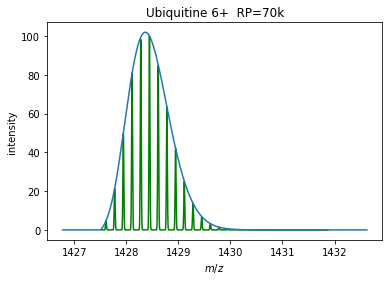

In [7]:
fubi6 = fubi + iso.parse_formula('H6')   # we assume positive H+ ionisation
D = fubi6.distribution()
print ("Simplified Isotopic pattern:\n",D,"\n")
# draw at Resolving Power = 70k
D.draw(charge=6, RP=70000)
# draw at very low res
D.draw_lowres(charge=6)
plt.title("Ubiquitine 6+  RP=70k");

##     Not only organic chemistry !


Isotopic distribution for Palladium:
101.905609  3.7321624588
103.904036  40.7610684230
104.905085  81.7050859861
105.903486  100.0000000000
107.903892  96.8166849616
109.905153  42.8832784486

monoisotopic mass of atoms is defined as the most naturally abundant, hence ¹⁰⁶Pd here



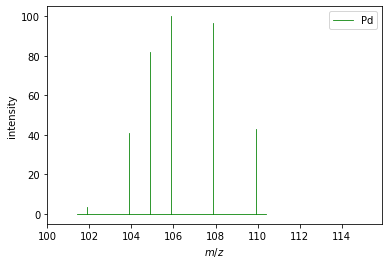

In [8]:
print("Isotopic distribution for Palladium:")
print( iso.parse_formula('Pd').distribution())
alloy = iso.parse_formula("Pd")
alloy.distribution().bar(label="Pd")
plt.legend()
plt.xlim(xmin=100)
print("monoisotopic mass of atoms is defined as the most naturally abundant, hence ¹⁰⁶Pd here\n")


Palladium alloy: Au2 Ca10 Ga10 Pd76
parsed formula Au_2 Ca_10 Ga_10 Pd_76
average mass: 9579.509  monoisotopic mass: 9531.480


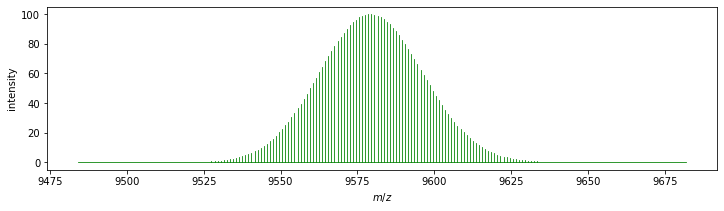

In [9]:
Pdalloy = "Au2 Ca10 Ga10 Pd76"
print("Palladium alloy:", Pdalloy)
alloy = iso.parse(Pdalloy)     # is a short cut for either parse_formula or parse_peptide - DANGEROUS -
print("parsed formula",alloy)
print ("average mass: %.3f  monoisotopic mass: %.3f"%(alloy.average(), alloy.monoisotop()))
plt.figure(figsize=(12,3))
alloy.distribution().bar()

## fine isotopic pattern
test distribution on insuline covalent dimer

*based on the excellent neutronstar program  from https://bitbucket.org/orserang/neutronstar.git* 

In [10]:
# NS contains the location of the neutronstar binary
# should be defined in the configuration part of the code, but can be given on the fly
iso.NS = "./neutronstar/src/neutronstar"

In [11]:
from pprint import pprint
cc = iso.parse_peptide("GIVEQCCASVCSLYQLENYCN")
cd = iso.parse_peptide("FVNQHLCGSHLVEALYLVCGERGFFYTPKA")

insuline = cc + cd - iso.parse_formula("H6")    # remove 6 H for 3 disulfides

D1 = insuline.distribution()
try:
    Df1 = insuline.fineisotopicdistrib()
    ok = True
except:
    print("neutronstar utilities is not installed - check instructions")
    ok = False
if ok:
    N = 20
    print ("First %d entries sorted by abundance"%N)
    pprint(Df1.distrib[0:N])  # sorted by abundance
    print ("\nand sorted by mass")
    Df1.sort_by_mass()
    pprint(Df1.distrib[0:N])

First 20 entries sorted by abundance
[5731.607581  100.0000000000,
 5732.610936  91.6079604605,
 5730.604226  72.4862356083,
 5733.614290  62.6903756950,
 5734.617645  34.1841515352,
 5733.603377  26.8593553603,
 5729.600871  26.1678415595,
 5734.606731  24.6053076384,
 5732.604616  23.7594368312,
 5733.607970  21.7655354980,
 5732.600022  19.4693356093,
 5731.601261  17.2223213607,
 5735.610086  16.8382307846,
 5735.621000  15.4713007967,
 5733.611826  15.4229530993,
 5734.611325  14.8948802125,
 5734.615180  14.1286527771,
 5732.608471  11.1795181213,
 5735.618535  9.6687072412,
 5736.613441  9.1816427378]

and sorted by mass
[5729.600871  26.1678415595,
 5730.597906  6.2173317854,
 5730.600259  1.2429315664,
 5730.604226  72.4862356083,
 5730.605088  0.7495663194,
 5730.607148  1.1416415952,
 5731.594941  0.7272384089,
 5731.596667  7.0285135546,
 5731.597294  0.2953135404,
 5731.599646  0.0245988776,
 5731.601261  17.2223213607,
 5731.602123  0.1780927362,
 5731.603614  3.442982875

try zooming on peaks


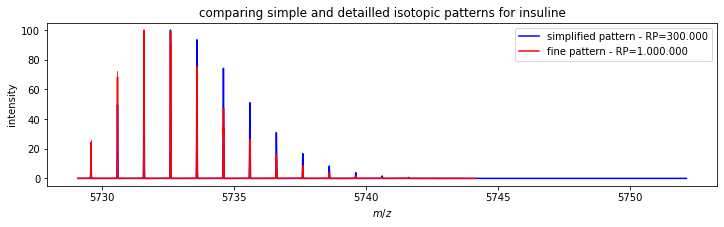

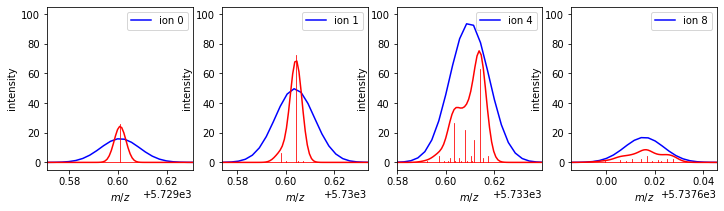

In [12]:
if ok:
    # computing with neutronstar is very fast - drawing fine isotopic at high RP is slow !
    plt.figure(1,figsize=(12,3))
    D1.draw(RP=3E5, color='b', label="simplified pattern - RP=300.000")
    Df1.draw(RP=1E6, color='r', label="fine pattern - RP=1.000.000")
    Df1.bar(color='r')
    plt.legend()
    plt.title("comparing simple and detailled isotopic patterns for insuline")
    plt.figure(2,figsize=(12,3))
    for i,ion in enumerate([0,1,4,8]):
        # inefficient code (redraw all and zoom) but easy to read
        plt.subplot(1,4,i+1)
        D1.draw(RP=3E5, color='b', label="ion %d"%ion)
        Df1.draw(RP=1E6, color='r')
        Df1.bar(color='r')
        plt.legend()
        plt.xlim(xmin=D1.distrib[ion].mass-0.03, xmax=D1.distrib[ion].mass+0.03)
    print("try zooming on peaks")

## PTM & fragmentation peptides
### let's phosphorylate Ubiquitin on Threonine 12  

In [13]:
 phosprot = ubi[:12]+"*"+ubi[12:]
U = iso.parse(ubi)
P = iso.parse(phosprot)
print("""a * indicates a phosphorylation - see below
here on T12  -  see https://pubmed.ncbi.nlm.nih.gov/33022275/ 
""",phosprot)
print("Average masses: native: %.2f,  phosphorylated: %.2f"%(U.average(), P.average()))
print("difference: %.2f"%(P.average()-U.average()))

a * indicates a phosphorylation - see below
here on T12  -  see https://pubmed.ncbi.nlm.nih.gov/33022275/ 
 MQIFVKTLTGKT*ITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG
Average masses: native: 8564.75,  phosphorylated: 8644.73
difference: 79.98


### simulate a tryptic cut at R42
and compute fragments b11 and y31

In [14]:
pep = phosprot[:43]
L = len(pep)
# generate a b/y fragmentation at position 11
cut = 11
pep_b = pep[:cut]
Mpep_b = iso.parse_peptide(pep_b, ends='b').monoisotop()
pep_y = pep[cut:]
Mpep_y = iso.parse_peptide(pep_y, starts='y').monoisotop()
print(" tryptic peptide:",pep)
print(" peptide b11 ", pep_b, "\n  monoisotopic: ",Mpep_b)
print(" peptide y31", pep_y,  "\n  monoisotopic: ",Mpep_y)


 tryptic peptide: MQIFVKTLTGKT*ITLEVEPSDTIENVKAKIQDKEGIPPDQQR
 peptide b11  MQIFVKTLTGK 
  monoisotopic:  1247.71858991597
 peptide y31 T*ITLEVEPSDTIENVKAKIQDKEGIPPDQQR 
  monoisotopic:  3571.7896622554294


`iso.parse_peptide` handles all this, here is the documentation:

In [15]:
import inspect
print(iso.parse_peptide.__name__, inspect.signature(iso.parse_peptide))
print(iso.parse_peptide.__doc__)

parse_peptide (st, extended=False, starts='NH2', ends='COOH')

    compute the formula of a peptide/protein given by one letter code
    
    formula = parse_peptide("ACDEY*GH")     # e.g.
    letter code is standard 1 letter code for amino-acids
    
    for xyz/abc fragmentation

    - starts is either 
        - "NH2" (default) - for a regular peptide
        - "x"  "y"  "z" - for MS fragments 
        - or any formula
    - ends is either
        - "COOH" (default) - for a regular peptide
        - "a"  "b"  "c" - for MS fragments 
        -  or any formula
    
    if extended is True, will also interpret U: Seleno-Cysteine and O: Pyrolysine

    codes for Post Translational Modifications (PTM)

    * phosphorylation
    a acetylation
    n amidation
    d deamidation
    h hydroxylation
    o oxydation
    + protonation
    - deprotonation
    m methylation
    b beta-mercaptoethanol adduct
    
    Remarks
    - the prgm does not verify the chemical coherence of the PTM !
    - 

## Compare ubiquitine native, and 80% ¹⁵N enriched 


Ubiquitin: MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG
C_378 H_629 N_105 O_118 S
     Isotope(element=7, isotop=14, mass=14.0030740048, abund=0.19999999999999996)
     Isotope(element=7, isotop=15, mass=15.0001088982, abund=0.8)
mass difference = 83.37


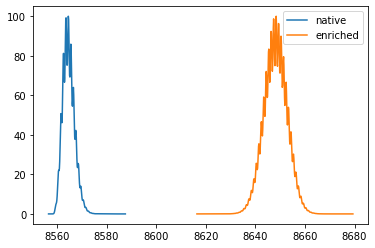

In [16]:
iso.initialize()
form = iso.parse_peptide(ubi)
print("Ubiquitin:", ubi)
print(form)
# native
Dn = form.distribution()
aven = form.average()

# enriched
iso.enrich(element="N", isotop=15, ratio=0.8) #  indicates a 80% 15N enrichment
De = form.distribution()
avee = form.average()

fig, ax = plt.subplots()
mn,yn = Dn.spectrify()   # spectrify returns (mass,int) ready to draw - RP is 10k by default
ax.plot(mn,yn, label="native")
me, ye = De.spectrify()
ax.plot(me, ye, label="enriched")
plt.legend()
print("mass difference = %.2f"%(avee-aven))

# enrich() modifies the internal database - so to undo, use iso.initialize() !
iso.initialize()